# **Israel Elections Data Analysis**

# **Gil Shiloh, Elky Shandor and Dean Tesler**


An example notebook showing how to read and display the Israel 2021 elections results. This is the notebook for the first week.

In [40]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')



Running on CoLab


In [41]:
# First install tha needed packages using conda in the current Jupyter kernel
# Run once - should take a long time!
import sys
#if not(run_in_colab):
#  !conda install --yes --prefix {sys.prefix} numpy
#  !conda install --yes --prefix {sys.prefix} pandas
#  !conda install --yes --prefix {sys.prefix} matplotlib
#  !conda install --yes --prefix {sys.prefix} statsmodels  # statistical modelling 
#  !conda install --yes --prefix {sys.prefix} xlrd  # read excel 



# Alternatively, if your python wasn't installed using anaconda, we can use pip install: 
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib


In [42]:
# Import modules 
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)

First, we need to mount our local drive to the colab network

In [43]:
# Mount drive in google colab
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "/Users/elkysandor/Desktop/huji yr3/static lab/"  


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Loading elections 2021 elections data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

Saving election_2020.csv to election_2020 (1).csv
Saving eshkol_hevrati_calcali.csv to eshkol_hevrati_calcali (1).csv
Saving votes per ballot 2020.csv to votes per ballot 2020 (1).csv
Saving votes per ballot 2021.csv to votes per ballot 2021 (1).csv
Saving votes per city 2021.csv to votes per city 2021 (1).csv


In [45]:
import io

In [46]:
from matplotlib import pyplot as plt

In [47]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum())
    return par[par > thresh]

Create a dictionary mapping parties names to voting letters

In [48]:
parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}


Read the election results by ballot (not city)

In [49]:
if   run_in_colab:
    df_2021_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
    df_2020_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:
  df_2021_ballots_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')  # need to read locally

In [50]:
df_2021_ballots = df_2021_ballots_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021_ballots = df_2021_ballots[df_2021_ballots.columns[8:-1]] # removing "metadata" columns
df_2021_ballots_raw = df_2021_ballots_raw.drop(index = "מעטפות חיצוניות")
df_2021_ind = df_2021_ballots_raw.set_index(["קלפי"], append=True)
df_2021_ballots= df_2021_ballots.drop(index = "מעטפות חיצוניות")
df_2021_ballots= df_2021_ballots.drop(columns=["כשרים","רק"])
#over_trsh_21 = df_2021[parties_dict_2021.keys()]
#over_trsh_21= over_trsh_21.drop("מעטפות חיצוניות")

# Solution: Lab-8

1

In [51]:
over_trash_bal_21 = df_2021_ballots[parties_dict_2021.keys()]
random_c = np.random.randint(0,(over_trash_bal_21.shape[0]-1),(100,7))

In [52]:
prob_bal = pd.DataFrame()

original = parties_votes_percents(df_2021_ballots, 0.035)
for i in random_c:
  random_bal = over_trash_bal_21.iloc[i]
  p_hat = random_bal.sum().div(random_bal.sum().sum(),axis=0)
  prob_bal = prob_bal.append(p_hat, ignore_index=True)

prob_bal_mean = prob_bal.mean(axis=0)
bias = prob_bal_mean - original
prob_bal_var = prob_bal.var()
prob_bal_mse = prob_bal_var + bias.pow(2)
final_table = pd.concat((prob_bal_mean, bias,prob_bal_var,prob_bal_mse),axis=1)
final_table.columns = ["Mean" , "bias", "var", "mse"]
final_table.T

,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
Mean,0.061614,0.060349,0.054453,0.053091,0.046887,0.068304,0.053821,0.246088,0.046106,0.051535,0.139768,0.072025,0.045960
bias,0.002819,0.001644,-0.004373,0.002596,-0.002885,0.001732,-0.001561,0.004425,0.000520,0.011309,0.000337,-0.001198,-0.000947
var,0.000789,0.000413,0.004150,0.003040,0.000570,0.000584,0.000767,0.004036,0.000567,0.003565,0.002180,0.001968,0.000110
mse,0.000797,0.000415,0.004169,0.003047,0.000579,0.000587,0.000770,0.004055,0.000568,0.003693,0.002180,0.001969,0.000111


The bias is close to 0 as expected by the thoery.

In [53]:
def bar_plot(df,compare_df = None):
    width = 0.3
    n = 13
    rev_names = [parties_dict_2021[name][::-1] for name in list(df.columns)]
    x_pos = np.arange(len(rev_names))
    fig, ax = plt.subplots()

    mean_bar = ax.bar(np.arange(n),df.mean(axis=0),width, color='pink',yerr = df.std(), align='center',capsize=10,ecolor='black',error_kw=dict(lw=1, capsize=3, capthick=1))
    if compare_df is not None:
      compare_bar = ax.bar(np.arange(n)+width,compare_df.mean(axis=0),width, color='yellow',yerr = compare_df.std(), align='center',capsize=10,ecolor='black',error_kw=dict(lw=1, capsize=3, capthick=1))
    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('probabilities estimators + error bars')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names,rotation=90)
    ax.yaxis.grid(True)
    plt.show()


    return fig, ax

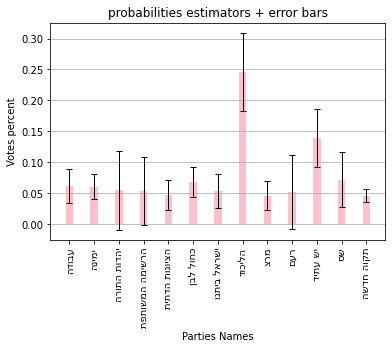

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb81b5e2dd0>)

In [54]:
bar_plot(prob_bal)

In [55]:
prob_bal_var.loc[["אמת","מרצ","ג","ת","ודעם","ב","ט","ל"]]

אמת     0.000789
מרצ     0.000567
ג       0.004150
ת       0.000110
ודעם    0.003040
ב       0.000413
ט       0.000570
ל       0.000767
dtype: float64

We can see that the variance for the parties that got 6 and 7 votes are very similiar.

# 2

In [56]:
if run_in_colab:
  df_2021_eshkol = pd.read_csv(io.BytesIO(uploaded['eshkol_hevrati_calcali.csv']),  encoding = 'iso-8859-8') 

In [57]:
check_merg = df_2021_ballots_raw.merge(df_2021_eshkol, how = 'inner',right_on = "set_code", left_on = "סמל ישוב")
names_idx = df_2021_ballots_raw.index[df_2021_ballots_raw["סמל ישוב"].isin(df_2021_eshkol["set_code"])]
final_df = check_merg.set_axis(names_idx)
big_eshkolot = check_merg.groupby("eco_level")["בזב"].sum().nlargest(7).index
big_eshkolot_final = final_df.loc[final_df["eco_level"].isin(big_eshkolot)]
big_eshkolot_final.set_index("eco_level",inplace=True,append=True)
big_parties_final = big_eshkolot_final[parties_dict_2021.keys()]
eshkolot_ksherim = check_merg.groupby("eco_level")["כשרים"].sum().nlargest(7)
weighted_prob = pd.DataFrame()
for j in range(100):
  p_hat_sample = pd.DataFrame()
  for i in big_eshkolot:
    sample = big_parties_final.loc[big_parties_final.index.get_level_values(1)==i].sample(1)
    p_hat_sample = p_hat_sample.append(sample.div(sample.sum(axis=1),axis=0), ignore_index=True)
  p_hat_sample.set_index(big_eshkolot,inplace=True)  
  p_hat_sample.index.set_names("eco_level",inplace=True)
  p_j_hat = p_hat_sample.mul(eshkolot_ksherim,axis=0).div(eshkolot_ksherim.sum()).sum()
  weighted_prob = weighted_prob.append(p_j_hat,  ignore_index=True)
weighted_prob_mean = weighted_prob.mean(axis=0)
bias_weighted = weighted_prob_mean - original
weighted_prob_var = weighted_prob.var()
weighted_prob_mse = weighted_prob_var + bias_weighted.pow(2)
weighted_table = pd.concat((weighted_prob_mean, bias,weighted_prob_var,weighted_prob_mse),axis=1)
weighted_table.columns = ["Mean" , "bias", "var", "mse"]
weighted_table.T

,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
Mean,0.060494,0.056962,0.050916,0.064146,0.045866,0.068623,0.058753,0.248247,0.046529,0.041154,0.139948,0.071563,0.046799
bias,0.002819,0.001644,-0.004373,0.002596,-0.002885,0.001732,-0.001561,0.004425,0.000520,0.011309,0.000337,-0.001198,-0.000947
var,0.000625,0.000415,0.002424,0.002947,0.000514,0.000319,0.000425,0.002848,0.000445,0.001300,0.000806,0.001300,0.000101
mse,0.000628,0.000418,0.002487,0.003134,0.000529,0.000323,0.000436,0.002891,0.000446,0.001301,0.000806,0.001302,0.000101


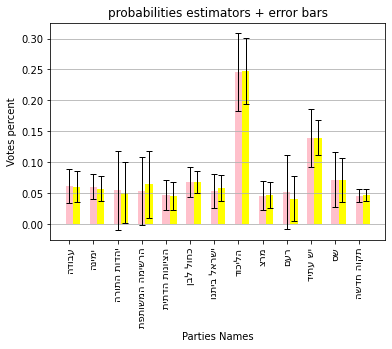

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb824b43610>)

In [58]:
bar_plot(prob_bal,weighted_prob)

In [59]:
diff_mse = prob_bal_mse.sum() - weighted_prob_mse.sum()

In [60]:
p_hat_sample.mul(eshkolot_ksherim,axis=0).div(eshkolot_ksherim.sum()).sum()

אמת     0.101100
מרצ     0.058778
ג       0.005559
עם      0.053320
ת       0.038526
ודעם    0.163751
ב       0.044500
ט       0.040282
ל       0.041504
מחל     0.253890
פה      0.111112
כן      0.050382
שס      0.037294
dtype: float64

In [61]:
print(f"the sum of weighted mse is: {weighted_prob_mse.sum()} compare to the sum of random samples mse is: {prob_bal_mse.sum()}")
print(f"and the diffrence is: {diff_mse}.")
print("we can see that the MSE for the layers estimate is lower then the of the sample. then we will prefer the layer sample ( the seconed method)")

the sum of weighted mse is: 0.01480277931047011 compare to the sum of random samples mse is: 0.022940695157763185
and the diffrence is: 0.008137915847293075.
we can see that the MSE for the layers estimate is lower then the of the sample. then we will prefer the layer sample ( the seconed method)


# 3

In [62]:
# nine_big = ["טב", "ל", "אמת", "ג", "שס", "ודעם", "פה", "מחל", "נץ"]
df_2020_ballots_big_par = df_2020_ballots_raw.set_index(["קלפי"], append=True)
# df_2020_ballots_big_par = df_2020_ballots_big_par.loc[:,nine_big]
df_2020_ballots_big_par["מרצ"] = df_2020_ballots_big_par["אמת"]*0.5
df_2020_ballots_big_par["אמת"] = df_2020_ballots_big_par["אמת"]*0.5
df_2020_ballots_big_par["עם"] = df_2020_ballots_big_par["ודעם"]*0.4
df_2020_ballots_big_par["ודעם"] = df_2020_ballots_big_par["ודעם"]*0.6
df_2020_ballots_big_par["ת"] = df_2020_ballots_big_par["מחל"]*0.167
df_2020_ballots_big_par["מחל"] = df_2020_ballots_big_par["מחל"]*0.833
df_2020_ballots_big_par["כן"] = df_2020_ballots_big_par["פה"]*0.333
df_2020_ballots_big_par["פה"] = df_2020_ballots_big_par["פה"]*0.667
df_2020_ballots_big_par["ב"] = df_2020_ballots_big_par["טב"]*0.6
df_2020_ballots_big_par["ט"] = df_2020_ballots_big_par["טב"]*0.4
df_2020_ballots_big_par["ט"] = df_2020_ballots_big_par["ט"]+df_2020_ballots_big_par["נץ"]
df_2020_ballots_big_par = df_2020_ballots_big_par.drop(columns = "נץ")
df_2020_ballots_big_par = df_2020_ballots_big_par.drop(columns = "טב")
df_2020_ballots_big_par = df_2020_ballots_big_par.iloc[:,9:]
df_2020_ballots_big_par = df_2020_ballots_big_par.drop(columns = "Unnamed: 41")

In [63]:
r_j = df_2020_ballots_big_par.sum().div(df_2020_ballots_big_par.sum().sum())
r_j = r_j[parties_dict_2021]

In [64]:
alphas = np.arange(0.01,1.01,0.01)

In [65]:
all_rj = df_2020_ballots_big_par.sum().div(df_2020_ballots_big_par.sum().sum())
all_rj = all_rj[parties_dict_2021].sort_index()

In [66]:
# p𝑗(α)= α*𝑝𝑗 + (1 − α)𝑟j
prob_bal_mean = prob_bal_mean.sort_index()
p_j_alphas = dict()
for a in alphas:
  p_j_alphas[a] = (a*prob_bal_mean) + ((1 - a)*all_rj)
p_j_alphas = pd.DataFrame(p_j_alphas).T
p_j_alphas

,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
0.01,0.029467,0.031757,0.059746,0.075797,0.025423,0.088349,0.057352,0.245491,0.029312,0.050693,0.176994,0.076838,0.049182
0.02,0.029791,0.032045,0.059693,0.075568,0.025640,0.088147,0.057316,0.245497,0.029481,0.050701,0.176618,0.076790,0.049150
0.03,0.030116,0.032334,0.059640,0.075338,0.025857,0.087944,0.057280,0.245503,0.029651,0.050710,0.176242,0.076741,0.049117
0.04,0.030441,0.032623,0.059586,0.075109,0.026073,0.087742,0.057245,0.245509,0.029821,0.050718,0.175866,0.076692,0.049085
0.05,0.030766,0.032912,0.059533,0.074880,0.026290,0.087540,0.057209,0.245515,0.029990,0.050727,0.175490,0.076644,0.049052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.96,0.060315,0.059194,0.054667,0.054008,0.046020,0.069114,0.053963,0.246063,0.045427,0.051501,0.141272,0.072219,0.046090
0.97,0.060639,0.059483,0.054613,0.053779,0.046236,0.068912,0.053928,0.246069,0.045597,0.051510,0.140896,0.072171,0.046058
0.98,0.060964,0.059772,0.054560,0.053550,0.046453,0.068709,0.053892,0.246075,0.045767,0.051518,0.140520,0.072122,0.046025
0.99,0.061289,0.060061,0.054506,0.053320,0.046670,0.068507,0.053856,0.246082,0.045936,0.051527,0.140144,0.072074,0.045992


In [67]:
# לפי השיטה שאור צוק לימד בכיתה
alphas_for_var = np.array(p_j_alphas.index**2).reshape([p_j_alphas.shape[0],1])
np_prob_bal_var = np.array(prob_bal_var).reshape([1,prob_bal_var.size])
var_p_alpha_j = alphas_for_var @ np_prob_bal_var
var_p_table = pd.DataFrame(var_p_alpha_j,columns=p_j_alphas.columns,index=alphas)

In [68]:
bias_pj = (all_rj - original)
alphas_for_bias = (1 - alphas).reshape((alphas.size,1))
bias_pj = np.array(bias_pj).reshape((1,bias_pj.size))
overall_bias = alphas_for_bias @ bias_pj
overall_bias_mul = overall_bias**2

In [69]:
overall_mse = var_p_alpha_j + overall_bias_mul

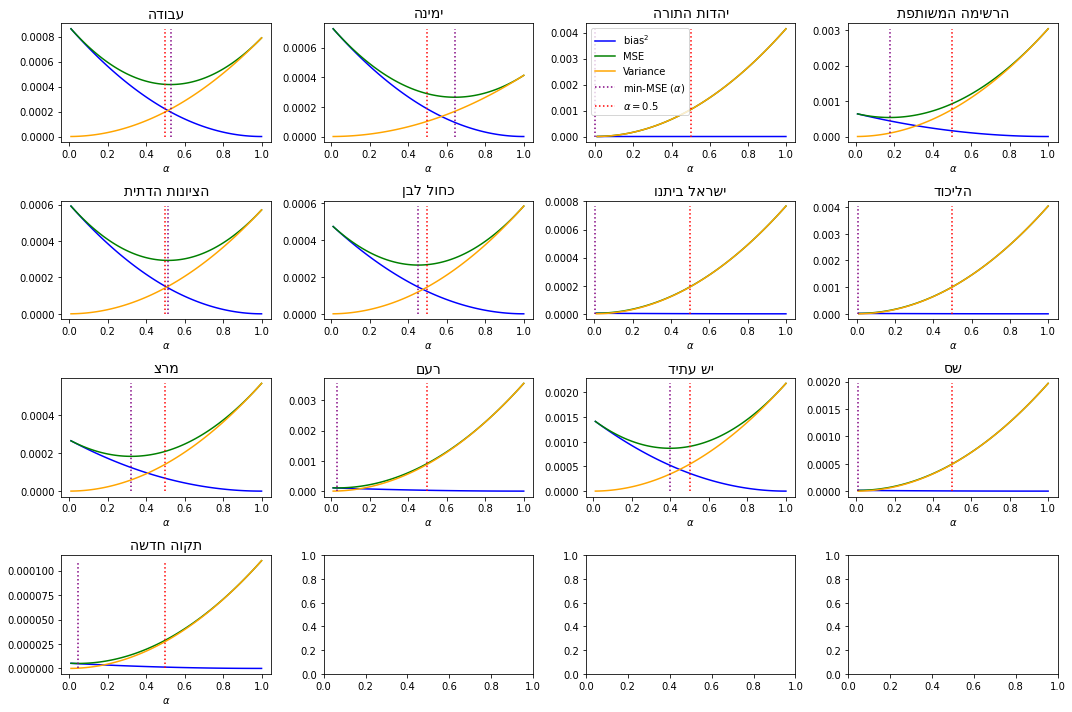

In [70]:
fig, ax = plt.subplots(4, 4, figsize=(15,10))
ax = ax.flat
for i,party in enumerate(p_j_alphas.columns):
    pow_bias = (bias_pj[0][i])**2   
    alpha_opt = pow_bias / (pow_bias + np_prob_bal_var[0][i])
    ax[i].plot(alphas,overall_bias_mul[:,i], color="blue")
    ax[i].plot(alphas, overall_mse[:,i], color="green")
    ax[i].plot(alphas,var_p_alpha_j[:,i], color="orange")
    ax[i].plot([alpha_opt,alpha_opt] ,[0,max(overall_mse[:,i])], linestyle = ':', color="purple")
    ax[i].plot([0.5,0.5] ,[0,max(overall_mse[:,i])], linestyle = ':', color="red")
    ax[i].set_title(parties_dict_2021[party][::-1], fontsize=14)
    ax[i].set_xlabel(r"$\alpha$")
    ax[2].legend(("bias$^2$", "MSE", "Variance",r"min-MSE $(\alpha)$",r"$\alpha = 0.5$"))
fig.tight_layout() 
plt.show()

We can see that for all parties MSE for alpha = 0.5 is lower then for alpha = 1, and from that we can say that alpha = 0.5 is better then alpha = 1 in terms of MSE . There isnt a constant alpha value that gives us the lower MSE possible for all the parties together. But we can see that for most of the parties the alpha that gives us the lowest MSE possible is around 0 or 0.5.